# Prediction of customer subscription to bank term depsosit using ANN inTensor Flow

<font color="blue">Karthick Selvaraj</font>

# II. Data



Introduction to Classification data:
------------------------------------------
Bank Marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 
This is a complete marketing data set from May 2008 to November 2010
    
Number of Instances: 45211 
Number of Attributes: 16 

Attribute information:

   Input variables:
  ---- bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   ---related with the last contact of the current campaign
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
  ----other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
#trasformation of data

import pandas as pd
import numpy as np
df = pd.read_csv("bank-full.csv", sep=';', header=None,low_memory=False,skiprows=[0])
df.columns =['age','job','marital_status','education','default_credit','yearly_balance','housing_loan',
             'personal_loan','contact','last_contact_day','last_contact_mth','last_contact_duration'
             ,'num_of_campaign','past_days','prev_num_contacts','poutcome','subscribed']
df['job']=df['job'].replace('blue-collar', 'bc', regex=True)
df['job']=df['job'].replace('admin.', 'ADMIN', regex=True)
df['job']=df['job'].replace('self-employed', 'selfer', regex=True)


df['job1']=df.job.map(dict(management=1,
technician=2,
entrepreneur=3,
bc	=4,
unknown	=0,
retired	=5,
ADMIN=6,
services=7,	
selfer=8,
unemployed	=9,
housemaid=10,
student	=11)
)



df['marital_status1']=df.marital_status.map(dict(married=1,
single=0,
divorced=2
))



df['education1']=df.education.map(dict(tertiary=3,
secondary=2,
unknown=0,
primary=1
))



df['default_credit1']=df.default_credit.map(dict(no=0,
yes=1
))


df['housing_loan1']=df.housing_loan.map(dict(no=0,
yes=1
))


df['personal_loan1']=df.personal_loan.map(dict(no=0,
yes=1
))



df['subscribed1']=df.subscribed.map(dict(no=0,
yes=1
))


df['last_contact_mth1']=df.last_contact_mth.map(dict(may=5,
jun=6,
jul=7,
aug=8,
oct=10,
nov=11,
dec=12,
jan=1,
feb=2,
mar=3,
apr=4,
sep=9
))



df['poutcome1']=df.poutcome.map(dict(unknown=3,
failure=0,
other=2,
success=1
))


df['contact1']=df.contact.map(dict(unknown=0,
cellular=1,
telephone=2))

df.isnull().any()

age                      False
job                      False
marital_status           False
education                False
default_credit           False
yearly_balance           False
housing_loan             False
personal_loan            False
contact                  False
last_contact_day         False
last_contact_mth         False
last_contact_duration    False
num_of_campaign          False
past_days                False
prev_num_contacts        False
poutcome                 False
subscribed               False
job1                     False
marital_status1          False
education1               False
default_credit1          False
housing_loan1            False
personal_loan1           False
subscribed1              False
last_contact_mth1        False
poutcome1                False
contact1                 False
dtype: bool

Text(0.5,1,'Job type Vs Term Deposit Subcribed Numbers')

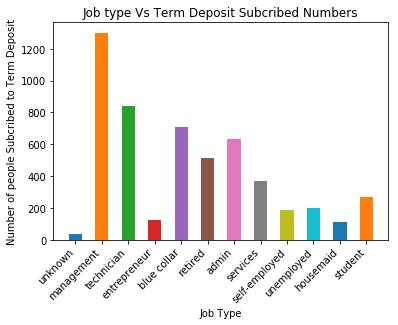

In [2]:
#Plot 1
#Job type Vs Term Deposit Subcribed Numbers

import matplotlib.pyplot as plt
%matplotlib inline

grouped = df.groupby(['job1'])
LABELS = ["unknown",
"management",
"technician",
"entrepreneur",
"blue collar",
"retired",
"admin",
"services",
"self-employed",
"unemployed",
"housemaid",
"student"]

data=grouped['subscribed1'].aggregate(np.sum)

for num, vals in enumerate(data):
    plt.bar(num, vals, 0.5)
    
arr=df.groupby('job1').apply(list)

plt.xticks( range(len(arr)),LABELS, rotation = 45, ha="right" )

plt.ylabel('Number of people Subcribed to Term Deposit')
plt.xlabel('Job Type')
plt.title('Job type Vs Term Deposit Subcribed Numbers')


Text(0.5,1,'Age Vs Term Deposit Subcribed Numbers')

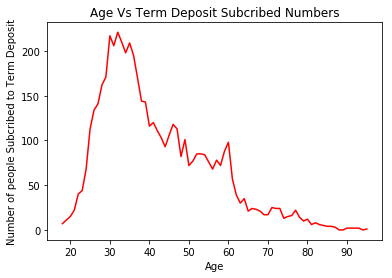

In [3]:
#plot 2
#Age Vs Term Deposit Subcribed Numbers


grouped1 = df.groupby(['age'])

data1=grouped1['subscribed1'].aggregate(np.sum).reset_index()

plt.plot(data1['age'], data1['subscribed1'],'r-')
plt.ylabel('Number of people Subcribed to Term Deposit')
plt.xlabel('Age')
plt.title('Age Vs Term Deposit Subcribed Numbers')

Text(0.5,1,'Marital Status Vs Term Deposit Subcribed Numbers')

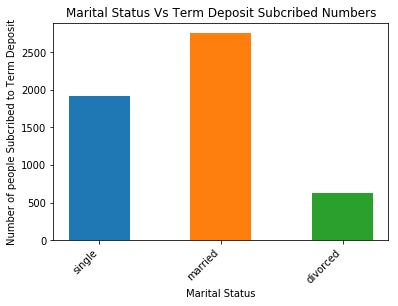

In [4]:
#plot 3
#Marital Status Vs Term Deposit Subcribed Numbers

grouped = df.groupby(['marital_status1'])
LABELS = ["single",
"married","divorced"]

data=grouped['subscribed1'].aggregate(np.sum)

for num, vals in enumerate(data):
    plt.bar(num, vals, 0.5)
    
arr=df.groupby('marital_status1').apply(list)

plt.xticks( range(len(arr)),LABELS, rotation = 45, ha="right" )

plt.ylabel('Number of people Subcribed to Term Deposit')
plt.xlabel('Marital Status')
plt.title('Marital Status Vs Term Deposit Subcribed Numbers')

Preliminary observation:
-------------------------
#Plot 1
#Job type Vs Term Deposit Subcribed Numbers

From this plot we can observe that Term deposit marketing works very well with  Entrepreneurs, Technician and  Blue collar jobs,
It works least with housemaids , self employed ,students and unemployed



#plot 2
#Age Vs Term Deposit Subcribed Numbers

From this plot we can see the Term Deposit subscribers peak between the age of 29-35 and gradually decrease with increase in age.Also there is low volume of subscription for ages below 25.


#plot 3
#Marital Status Vs Term Deposit Subcribed Numbers
From this plot we can obeserve that more numebr of married people prefer term deposit followed by people who are single.


In [5]:
# Trasnformation Continued..

import pandas as pd
import numpy as np

df = pd.read_csv('bank1.csv')
df.head()
df['past_days']=df['past_days'].replace(-1, 0)
df['subscribed']=df['subscribed'].replace('no', 0)
df['subscribed']=df['subscribed'].replace('yes', 1)


normalized_age=(df['age']-df['age'].mean())/df['age'].std()
normalized_yearly_balance=(df['yearly_balance']-df['yearly_balance'].mean())/df['yearly_balance'].std()
normalized_last_contact_duration=(df['last_contact_duration']-df['last_contact_duration'].mean())/df['last_contact_duration'].std()
normalized_num_of_campaign=(df['num_of_campaign']-df['num_of_campaign'].mean())/df['num_of_campaign'].std()
normalized_prev_num_contacts=(df['prev_num_contacts']-df['prev_num_contacts'].mean())/df['prev_num_contacts'].std()
normalized_past_days=(df['past_days']-df['past_days'].mean())/df['past_days'].std()

Xnor = pd.concat([normalized_age,
        pd.get_dummies(df.loc[:, 'job']), 
        pd.get_dummies(df.loc[:, 'marital_status']), 
        pd.get_dummies(df.loc[:, 'education']),
        pd.get_dummies(df.loc[:, 'default_credit']),
        normalized_yearly_balance,
        pd.get_dummies(df.loc[:, 'housing_loan']),
        pd.get_dummies(df.loc[:, 'personal_loan']),
        normalized_last_contact_duration  ,
        normalized_num_of_campaign  ,
        normalized_past_days  ,
        normalized_prev_num_contacts ,
        pd.get_dummies(df.loc[:, 'poutcome']),
        pd.get_dummies(df.loc[:,'subscribed'])],
       axis=1)
pd.set_option('display.max_columns',500)

X = pd.concat([df['age'],
        pd.get_dummies(df.loc[:, 'job']), 
        pd.get_dummies(df.loc[:, 'marital_status']), 
        pd.get_dummies(df.loc[:, 'education']),
        pd.get_dummies(df.loc[:, 'default_credit']),
        df['yearly_balance'],
        pd.get_dummies(df.loc[:, 'housing_loan']),
        pd.get_dummies(df.loc[:, 'personal_loan']),
        df['last_contact_duration']  ,
        df['num_of_campaign']  ,
        df['past_days']  ,
        df['prev_num_contacts'] ,
        pd.get_dummies(df.loc[:, 'poutcome']),
        df['subscribed']],
       axis=1)
pd.set_option('display.max_columns',500)




Xnorx=Xnor.iloc[:,:35]
T=Xnor.iloc[:,35:]


Xnorx.shape



(45211, 35)

In [6]:
#partioning of data into train and test in ratio 80% to 20 %

def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts


Xlstnor, Tlstnor = partition(pd.DataFrame(Xnorx), pd.DataFrame(T))

#pocket:

Xnortrain=Xlstnor[0].head(8000).values
Xnortest=Xlstnor[1].head(2000).values
Tnortrain=Tlstnor[0].head(8000).values
Tnortest=Tlstnor[1].head(2000).values

#(Xnortrain,Xnortest,Tnortrain,Tnortest)


Xt=Xlstnor[0].head(8000).values
Tt=Tlstnor[0].head(8000).values



#np.unique(Tnortest,return_counts=True)



![](https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67)



Explanation of codes for each structure
------------------------------------------


#1- Architecture:

I used tensorflow to implement MLP , and I have used Adam optimiser for optimization . The code basically has the weights variable where weights of diffrent layer is specified and bias variable , which holds the bias for each layer.
The ouput of each layer is passed on the next layer during feed forward and same process is reversed during cost optimisation step during backpropagation.
Architecture-1 is designed to have 10 nodes at each layer with five hidden layers apart from 35 inputs and 2 node output.

#2- Architecture:

The implemntation of code for the Architecture 2 is same as that of Architecture 1. Architecture-2 is designed to have 20 nodes at each layer with five hidden layers apart from 35 inputs and 2 node output.

#3- Architecture:

The implemntation of code for the Architecture 2 is same as that of Architecture 1 and 2. Architecture-2 is designed to have 5 nodes at each layer with 10 hidden layers apart from 35 inputs and 2 node output.



Explanation of experimental codes
-----------------------------------

From the curve of the cost error we can oberve that architecure -2 with 20 nodes at each layer with 5 hidden layers , optimises very quickly , the cost error minimizes to a saturation in about 25 iterations over the data.

While the cost error function curve is less sharp for atchiteture 1 and 3 as it takes atleast 100 iterations for cost error to minimize to a saturation.













# 1- Architecture
# Implementation of MultiLayer Perceptron With 10 Hidden Layers 
# Number of hidden Layers : 5
# Number of nuerons per layer : 5
# With 10-10-10-10-10 Hidden Layer Neurons at each layer

In [7]:
# Implementation of MultiLayer Perceptron With 5 Hidden Layers 
# WITH 10-10-10-10-10 Hidden Layer Neurons at
#Refrence to tensor flow for MLP : https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/


import tensorflow as tf

n_hidden_1 = 10
n_hidden_2 = 10
n_hidden_3 = 10
n_hidden_4 = 10
n_hidden_5 = 10
n_input = 35 
n_classes = 2 



learning_rate = 0.001
training_epochs = 200
batch_size = 100
display_step = 1




X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])




weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_hidden_5, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'b5': tf.Variable(tf.random_normal([n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}



def multilayer_perceptron(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    out_layer = tf.matmul(layer_5, weights['out']) + biases['out']
    return out_layer



logits = multilayer_perceptron(X)


loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
init = tf.global_variables_initializer()



with tf.Session() as sess:
    sess.run(init)
    e1=[]
    c1=[]
    for epoch in range(training_epochs):
        cost = 0.
        a,c = sess.run([train_op, loss_op], feed_dict={X: Xt,Y: Tt})
        cost =cost+ c 
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(cost))
            e1.append(epoch+1)
            c1.append(cost)
    print("Optimization Finished!")

    pred = tf.nn.softmax(logits)  
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    predictions = pred.eval(feed_dict = {X:Xt})
    

    print("Accuracy:", (accuracy.eval({X:Xt , Y: Tt})*100 ,"%"))



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Epoch: 0001 cost=46.130271912
Epoch: 0002 cost=44.567329407
Epoch: 0003 cost=43.053882599
Epoch: 0004 cost=41.578178406
Epoch: 0005 cost=40.127265930
Epoch: 0006 cost=38.712291718
Epoch: 0007 cost=37.333587646
Epoch: 0008 cost=35.992835999
Epoch: 0009 cost=34.692180634
Epoch: 0010 cost=33.414966583
Epoch: 0011 cost=32.164676666
Epoch: 0012 cost=30.951604843
Epoch: 0013 cost=29.768291473
Epoch: 0014 cost=28.627933502
Epoch: 0015 cost=27.525438309
Epoch: 0016 cost=26.453512192
Epoch: 0017 cost=25.423530579
Epoch: 0018 cost=24.436191559
Epoch: 0019 cost=23.500194550
Epoch: 0020 cost=22.592674255
Epoch: 0021 cost=21.740797043
Epoch: 0022 cost=20.929534912
Epoch: 0023 cost=20.158826828
Epoch: 0024 cost=19.420026779
Epoch: 0025 cost=18.708309174
Epoch: 0026 cost=18.023836136
Epoch: 0027 cost=17.377847672
E

# 2- Architecture
# Implementation of MultiLayer Perceptron With 10 Hidden Layers 
# Number of hidden Layers : 5
# Number of nuerons per layer : 20
# With 20-20-20-20-20 Hidden Layer Neurons at each layer

In [8]:
# 2- Architecture
# Implementation of MultiLayer Perceptron With 10 Hidden Layers 
# Number of hidden Layers : 5
# Number of nuerons per layer : 20
# With 20-20-20-20-20 Hidden Layer Neurons at each layer

#Refrence to tensor flow for MLP : https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/


import tensorflow as tf


n_hidden_1 = 20 
n_hidden_2 = 20 
n_hidden_3 = 20
n_hidden_4 = 20 
n_hidden_5 = 20 
n_input = 35 
n_classes = 2 


learning_rate = 0.001
training_epochs = 200
batch_size = 100
display_step = 1



X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])



weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_hidden_5, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'b5': tf.Variable(tf.random_normal([n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}




def multilayer_perceptron(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    out_layer = tf.matmul(layer_5, weights['out']) + biases['out']
    return out_layer



logits = multilayer_perceptron(X)


loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
init = tf.global_variables_initializer()



with tf.Session() as sess:
    sess.run(init)
    e2=[]
    c2=[]
    for epoch in range(training_epochs):
        cost = 0.
        a,c = sess.run([train_op, loss_op], feed_dict={X: Xt,Y: Tt})
        cost =cost+ c 
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(cost))
            e2.append(epoch+1)
            c2.append(cost)
    print("Optimization Finished!")

    pred = tf.nn.softmax(logits)  
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    predictions = pred.eval(feed_dict = {X:Xt})
    

    print("Accuracy:", (accuracy.eval({X:Xt , Y: Tt})*100 ,"%"))




Epoch: 0001 cost=6449.021484375
Epoch: 0002 cost=6036.676757812
Epoch: 0003 cost=5631.274902344
Epoch: 0004 cost=5233.040039062
Epoch: 0005 cost=4842.841796875
Epoch: 0006 cost=4462.480468750
Epoch: 0007 cost=4092.177001953
Epoch: 0008 cost=3732.047851562
Epoch: 0009 cost=3383.355957031
Epoch: 0010 cost=3048.308837891
Epoch: 0011 cost=2728.337890625
Epoch: 0012 cost=2424.258544922
Epoch: 0013 cost=2137.196533203
Epoch: 0014 cost=1868.480712891
Epoch: 0015 cost=1620.623168945
Epoch: 0016 cost=1393.368530273
Epoch: 0017 cost=1186.925903320
Epoch: 0018 cost=1002.969116211
Epoch: 0019 cost=842.593505859
Epoch: 0020 cost=705.466857910
Epoch: 0021 cost=591.089477539
Epoch: 0022 cost=498.575042725
Epoch: 0023 cost=425.877166748
Epoch: 0024 cost=370.187255859
Epoch: 0025 cost=328.873687744
Epoch: 0026 cost=298.751373291
Epoch: 0027 cost=276.426177979
Epoch: 0028 cost=260.097900391
Epoch: 0029 cost=248.786590576
Epoch: 0030 cost=240.731658936
Epoch: 0031 cost=235.377502441
Epoch: 0032 cost=231.


# 3- Architecture
# Implementation of MultiLayer Perceptron With 10 Hidden Layers 
# Number of hidden Layers : 10
# Number of nuerons per layer : 5
# With 5-5-5-5-5-5-5-5-5-5 Hidden Layer Neurons at layer


In [9]:
# 3- Architecture
# Implementation of MultiLayer Perceptron With 10 Hidden Layers 
# Number of hidden Layers : 10
# Number of nuerons per layer : 5
# With 5-5-5-5-5-5-5-5-5-5 Hidden Layer Neurons at layer


#Refrence to tensor flow for MLP : https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/

import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 200
batch_size = 100
display_step = 1




n_hidden_1 = 5 
n_hidden_2 = 5 
n_hidden_3 = 5 
n_hidden_4 = 5 
n_hidden_5 = 5 
n_hidden_6 = 5 
n_hidden_7 = 5 
n_hidden_8 = 5 
n_hidden_9 = 5 
n_hidden_10 = 5 
n_input = 35 
n_classes = 2 




X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])




weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.random_normal([n_hidden_5, n_hidden_6])),
    'h7': tf.Variable(tf.random_normal([n_hidden_6, n_hidden_7])),
    'h8': tf.Variable(tf.random_normal([n_hidden_7, n_hidden_8])),
    'h9': tf.Variable(tf.random_normal([n_hidden_8, n_hidden_9])),
    'h10': tf.Variable(tf.random_normal([n_hidden_9, n_hidden_10])),
    'out': tf.Variable(tf.random_normal([n_hidden_10, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'b5': tf.Variable(tf.random_normal([n_hidden_5])),
    'b6': tf.Variable(tf.random_normal([n_hidden_6])),
    'b7': tf.Variable(tf.random_normal([n_hidden_7])),
    'b8': tf.Variable(tf.random_normal([n_hidden_8])),
    'b9': tf.Variable(tf.random_normal([n_hidden_9])),
    'b10': tf.Variable(tf.random_normal([n_hidden_10])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}



# Create model
def multilayer_perceptron(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_7 = tf.add(tf.matmul(layer_6, weights['h7']), biases['b7'])
    layer_8 = tf.add(tf.matmul(layer_7, weights['h8']), biases['b8'])
    layer_9 = tf.add(tf.matmul(layer_8, weights['h9']), biases['b9'])
    layer_10 = tf.add(tf.matmul(layer_9, weights['h10']), biases['b10'])
    out_layer = tf.matmul(layer_10, weights['out']) + biases['out']
    return out_layer




logits = multilayer_perceptron(X)


loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
init = tf.global_variables_initializer()



with tf.Session() as sess:
    sess.run(init)
    e3=[]
    c3=[]
    for epoch in range(training_epochs):
        cost = 0.
        a,c = sess.run([train_op, loss_op], feed_dict={X: Xt,Y: Tt})
        cost =cost+ c       
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(cost))
            e3.append(epoch+1)
            c3.append(cost)
    print("Optimization Finished!")

    pred = tf.nn.softmax(logits)  
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    predictions = pred.eval(feed_dict = {X:Xt})
    

    print("Accuracy:", (accuracy.eval({X:Xt , Y: Tt})*100 ,"%"))



Epoch: 0001 cost=1742.558837891
Epoch: 0002 cost=1685.307983398
Epoch: 0003 cost=1631.206054688
Epoch: 0004 cost=1580.078002930
Epoch: 0005 cost=1531.595214844
Epoch: 0006 cost=1485.405761719
Epoch: 0007 cost=1441.359985352
Epoch: 0008 cost=1399.576293945
Epoch: 0009 cost=1359.744262695
Epoch: 0010 cost=1321.664306641
Epoch: 0011 cost=1285.434814453
Epoch: 0012 cost=1250.626464844
Epoch: 0013 cost=1217.182861328
Epoch: 0014 cost=1185.148803711
Epoch: 0015 cost=1154.464599609
Epoch: 0016 cost=1124.971069336
Epoch: 0017 cost=1096.454833984
Epoch: 0018 cost=1068.959472656
Epoch: 0019 cost=1042.352416992
Epoch: 0020 cost=1016.464599609
Epoch: 0021 cost=991.389648438
Epoch: 0022 cost=967.055358887
Epoch: 0023 cost=943.402648926
Epoch: 0024 cost=920.327148438
Epoch: 0025 cost=897.854858398
Epoch: 0026 cost=875.992370605
Epoch: 0027 cost=854.668701172
Epoch: 0028 cost=833.891235352
Epoch: 0029 cost=813.633544922
Epoch: 0030 cost=793.868041992
Epoch: 0031 cost=774.588073730
Epoch: 0032 cost=75

# IV - Results

- Presents the results of applications of your deep networks.
- Visualize the results 
- Discuss about the choice of network structures and performance of it as you change the structures.  
- What do you think about the results? 

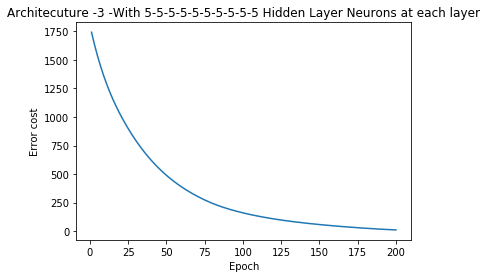

In [10]:
#Plot - Architecuture -3

import matplotlib.pyplot as plt
%matplotlib inline


plt.title('Architecuture -3 -With 5-5-5-5-5-5-5-5-5-5 Hidden Layer Neurons at each layer')
plt.xlabel('Epoch')
plt.ylabel('Error cost')
plt.plot(e3,c3)





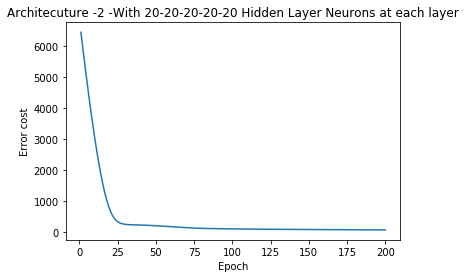

In [11]:
#Plot - Architecuture -2

import matplotlib.pyplot as plt
%matplotlib inline


plt.title('Architecuture -2 -With 20-20-20-20-20 Hidden Layer Neurons at each layer')
plt.xlabel('Epoch')
plt.ylabel('Error cost')
plt.plot(e2,c2)

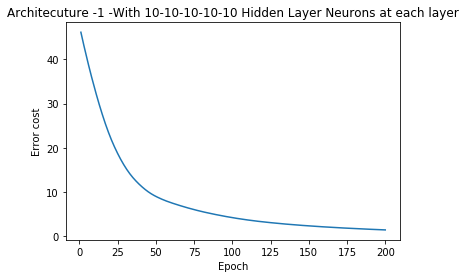

In [12]:
#Plot - Architecuture -1

import matplotlib.pyplot as plt
%matplotlib inline


plt.title('Architecuture -1 -With 10-10-10-10-10 Hidden Layer Neurons at each layer')
plt.xlabel('Epoch')
plt.ylabel('Error cost')
plt.plot(e1,c1)

Discussions about the choice of network structures
--------------------------------------------------

The choice of network will be architechture -2 with 20-20-20-20-20 with 20 nodes at 5 hidden layers. The choice is based on the accuracy achieved which was around 96% highest among the three architectures analysed and also the cost error reduces very quickly even with 25 iterations over the data.

Increase the number of nodes and increase in the number of hidden layers proves detrimental accuracy and pace with which we can reduce the cost error.